<img src="../imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **Bidirectional Encoder Representations from Transformers (BERT)**

## **BERT (Bidirectional Encoder Representations from Transformers)**

https://arxiv.org/pdf/1810.04805.pdf


Desarrollado por Google en 2018, marcó un hito significativo en el campo del NLP. Este modelo se basa en la arquitectura Transformer, introducida en 2017 por Vaswani et al., y es conocido por su capacidad de entender el contexto de las palabras en el texto de una manera más sofisticada que los modelos anteriores. A diferencia de los enfoques anteriores que procesaban el texto de manera secuencial (de izquierda a derecha o viceversa), BERT analiza el texto en ambas direcciones simultáneamente. Esta bidireccionalidad permite a BERT capturar el contexto completo de una palabra, mirando tanto el texto anterior como el siguiente. Esto lo hace particularmente eficaz para entender el significado y la intención detrás de las palabras en oraciones complejas.

BERT se preentrena en un corpus masivo de texto no etiquetado y utiliza dos estrategias principales:

- **Masked Language Model (MLM):** donde se ocultan aleatoriamente palabras del texto y el modelo aprende a predecirlas.

- **Next Sentence Prediction (NSP):** donde el modelo aprende a predecir si una oración es la continuación lógica de otra.

<div align="center">
    <img src="./imgs/BERT_MODEL.svg" width="750px">
</div>

### **1. Masked Language Model (MLM)**

1. **Enmascaramiento de Tokens**:
   - Alrededor del 15% de los tokens en cada secuencia de entrada se seleccionan al azar para ser enmascarados.
   - Estos tokens seleccionados se reemplazan con un token especial `[MASK]`.

2. **Diversificación en el Enmascaramiento**:
   - No todos los tokens seleccionados se enmascaran de la misma manera:
     - Un 80% de las veces, el token seleccionado se reemplaza realmente por `[MASK]`.
     - Un 10% de las veces, no se utiliza el token `[MASK]` sino que se reemplaza con un token aleatorio.
     - En el 10% restante, el token se deja sin cambios. Esto se hace con fines de evaluación para ver si el modelo aprende a confirmar la idoneidad de las palabras actuales en su contexto original.

     Al diversificar el enmascaramiento, se asegura que el modelo no se sobreajuste a los tokens [MASK] y que aprenda a utilizar el contexto para predecir palabras, lo cual es más representativo de cómo se utilizará el modelo en aplicaciones del mundo real.

     Al dejar algunos tokens seleccionados sin cambios, BERT aprende a predecir la idoneidad de las palabras actuales en su contexto original.

     La sustitución con tokens aleatorios ayuda a que el modelo sea robusto frente a entradas inesperadas o ruidosas, mejorando su capacidad para manejar errores o variaciones en los datos de entrada.

3. **Predicción de Tokens Enmascarados**:
   - El objetivo del modelo durante el entrenamiento es predecir los tokens originales de aquellos que han sido enmascarados o alterados.
   - Esto enseña a BERT a entender el contexto y la relación entre las palabras en una secuencia.

### **2. Next Sentence Prediction (NSP)**

1. **Entendimiento de Relaciones entre Oraciones**:
   - NSP es una tarea de clasificación binaria para predecir si una oración B es la continuación lógica de una oración A.

2. **Preparación de Datos de Entrenamiento**:
   - Durante el preentrenamiento, se toman pares de oraciones de un corpus de texto.
   - En aproximadamente el 50% de los casos, la oración B es de hecho la oración que sigue naturalmente a la oración A.
   - En el otro 50%, la oración B es una oración aleatoria del corpus, no relacionada con la oración A.

3. **Uso del Token `[CLS]`**:
   - Para cada par de oraciones, el token `[CLS]` se añade al principio, y un token `[SEP]` se utiliza para separar las dos oraciones.
   - El modelo utiliza la representación del token `[CLS]` para hacer la predicción.

### Importancia del Preentrenamiento

1. **Aprendizaje de Contexto y Relaciones**:
   - MLM y NSP juntos enseñan a BERT a entender tanto el contexto a nivel de palabra (a través de MLM) como las relaciones entre oraciones completas (a través de NSP).


2. **Aplicabilidad en Tareas de NLP**:
   - Una vez preentrenado, BERT puede ser afinado con un conjunto de datos más pequeño para tareas específicas de NLP, como la clasificación de texto, la respuesta a preguntas y el reconocimiento de entidades nombradas.


### **BERT - 🤗 Hugging Face**

Vamos a crear un modelo BERT con la librería HuggingFace que nos permita utilizar modelos preentrenados y re-entrenarlos para las tareas que queramos. En este caso, vamos a realizar la clasificación de noticias en tres categorías: deportes, cultura y política.

#### **Modelo**

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Revisa el modelo que acabamos de crear. Comprueba que los elementos que lo componen y su estructura corresponden con lo que hemos visto en la teoría. ¿A qué corresponde el *pooler*?

In [2]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

#### **BertPooler**

El BertPooler es un componente específico diseñado para procesar la salida del token especial [CLS] al final de todas las capas o bloques *transformers*. El objetivo principal del BertPooler es condensar la información de toda la secuencia de entrada en una sola representación fija que puede ser utilizada para tareas de clasificación u otras tareas de nivel superior.

La operación típica dentro del BertPooler es una transformación lineal seguida de una función de activación, generalmente una función tanh. En tareas de clasificación, como determinar el sentimiento de una reseña o clasificar un documento según su contenido, la salida del BertPooler se utiliza para hacer predicciones finales. La representación condensada proporciona una vista global del texto que es esencial para este tipo de tareas.


#### **Tokenizador**

El tokenizador de BERT es una herramienta crucial en la preparación de datos para el entrenamiento o la inferencia con el modelo BERT. El tokenizador devuelve un diccionario con los tokens codificados y las máscaras de atención necesarias para el modelo.

- `input_ids`: los tokens codificados.
- `token_type_ids`: identificador de tipo de token que se utiliza para distinguir entre las dos oraciones en la tarea de NSP.
- `attention_mask`: máscara de atención que indica a BERT qué tokens deben ser atendidos y cuáles no. Es decir, qué tokens son reales y cuáles son relleno [PAD].

In [3]:
result = tokenizer.encode_plus("Hello, my dog is cute", add_special_tokens=False, return_tensors="pt")

print(result.keys())
print(result['input_ids'])
print(result['token_type_ids'])
print(result['attention_mask'])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
tensor([[31178,   117, 15127, 17835, 10124, 21610, 10112]])
tensor([[0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1]])


In [4]:
result = tokenizer.encode_plus("Hello, my dog is cute", add_special_tokens=True, return_tensors="pt")
print(result.keys())
print(result['input_ids'])
print(result['token_type_ids'])
print(result['attention_mask'])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
tensor([[  101, 31178,   117, 15127, 17835, 10124, 21610, 10112,   102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [4]:
result = tokenizer.decode([101, 31178,   117, 15127, 17835, 10124, 21610, 10112, 102])
print(result)

[CLS] Hello, my dog is cute [SEP]


In [6]:
result = tokenizer.encode_plus("Hello, my dog is cute.","And my cat too.", add_special_tokens=True, return_tensors="pt")
print(result.keys())
print(result['input_ids'])
print(result['token_type_ids'])
print(result['attention_mask'])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
tensor([[  101, 31178,   117, 15127, 17835, 10124, 21610, 10112,   119,   102,
         12689, 15127, 41163, 16683,   119,   102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [9]:
result = tokenizer.decode([101, 31178,   117, 15127, 17835, 10124, 21610, 10112,   119,   102,
         12689, 15127, 41163, 16683,   119,   102])
print(result)

[CLS] Hello, my dog is cute. [SEP] And my cat too. [SEP]


In [6]:
import torch
from torch.utils.data import Dataset

class TextClassificationDataset(Dataset):
    def __init__(self, filename, tokenizer, max_length=256):
        self.tokenizer = tokenizer
        self.sentences = []
        self.labels = []
        self.max_length = max_length

        with open(filename, 'r', encoding='utf-8') as file:
            for line in file:
                start = line.find('"')
                end = line.find('"', start + 1)
                sentence = line[start + 1:end].strip()
                label = int(line[end + 1:].strip()[-1])

                # Crear los tokens para alimentar a BERT de HuggingFace
                tokens = self.tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=self.max_length, truncation=True, padding='max_length', return_tensors='pt')
                self.sentences.append(tokens)
                self.labels.append(label)

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        item = {key: val for key, val in self.sentences[idx].items()}
        item['labels'] = torch.tensor(self.labels[idx])
        item['input_ids'] = item['input_ids'].squeeze()
        item['attention_mask'] = item['attention_mask'].squeeze()
        item['token_type_ids'] = item['token_type_ids'].squeeze()
        
        return item
            

# Creamos el conjunto de datos
dataset = TextClassificationDataset('data/dataset_clas_texto.txt', tokenizer)

# Separamos el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

#### **Entrenamiento**

Usaremos el objeto *Trainer* de la librería *transformers* para entrenar nuestro modelo. Para ello, necesitamos el modelo, el tokenizador, los datos de entrenamiento y los datos de validación. Todos los parámetros que necesitamos para el entrenamiento están definidos en el objeto *TrainingArguments*.

In [7]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="test_trainer",
    num_train_epochs=3,
    logging_steps=1,
    logging_strategy='steps'
)

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [8]:
trainer.train()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/30 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 1.1429, 'learning_rate': 4.8333333333333334e-05, 'epoch': 0.1}
{'loss': 1.0467, 'learning_rate': 4.666666666666667e-05, 'epoch': 0.2}
{'loss': 0.7933, 'learning_rate': 4.5e-05, 'epoch': 0.3}
{'loss': 1.2766, 'learning_rate': 4.3333333333333334e-05, 'epoch': 0.4}
{'loss': 0.9082, 'learning_rate': 4.166666666666667e-05, 'epoch': 0.5}
{'loss': 0.641, 'learning_rate': 4e-05, 'epoch': 0.6}
{'loss': 0.5573, 'learning_rate': 3.8333333333333334e-05, 'epoch': 0.7}
{'loss': 0.4203, 'learning_rate': 3.6666666666666666e-05, 'epoch': 0.8}
{'loss': 0.4596, 'learning_rate': 3.5e-05, 'epoch': 0.9}
{'loss': 0.4265, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0}
{'loss': 0.3439, 'learning_rate': 3.1666666666666666e-05, 'epoch': 1.1}
{'loss': 0.3159, 'learning_rate': 3e-05, 'epoch': 1.2}
{'loss': 0.1833, 'learning_rate': 2.8333333333333335e-05, 'epoch': 1.3}
{'loss': 0.1578, 'learning_rate': 2.6666666666666667e-05, 'epoch': 1.4}
{'loss': 0.3174, 'learning_rate': 2.5e-05, 'epoch': 1.5}
{'

TrainOutput(global_step=30, training_loss=0.33358038067817686, metrics={'train_runtime': 22.9298, 'train_samples_per_second': 10.467, 'train_steps_per_second': 1.308, 'train_loss': 0.33358038067817686, 'epoch': 3.0})

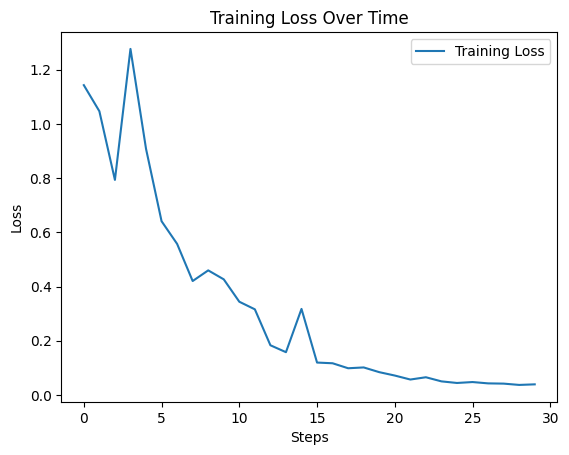

In [9]:
import os
import matplotlib.pyplot as plt
import json

def plot_training_loss(log_dir):
    history = trainer.state.log_history
    training_loss = [log['loss'] for log in history if 'loss' in log]

    plt.plot(training_loss, label='Training Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.show()

plot_training_loss('./logs')

#### **Inferencia**

Vamos a probar nuestro modelo con algunas noticias de ejemplo.

In [10]:
sentences = []
labels = []

with open('data/dataset_clas_texto_test.txt', 'r', encoding='utf-8') as file:
            for line in file:
                start = line.find('"')
                end = line.find('"', start + 1)
                sentence = line[start + 1:end].strip()
                label = int(line[end + 1:].strip()[-1])
                sentences.append(sentence)
                labels.append(label)                

In [11]:
clases = {
    0: 'Deportes',
    1: 'Cultura',
    2: 'Política'
}

device = torch.device("cpu")
model = model.to(device)

In [12]:
aciertos = 0
for sentence, label in zip(sentences, labels):
    tokens = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=256, truncation=True, padding='max_length', return_tensors='pt')
    tokens.to(device)
    outputs = model(**tokens)
    y_pred = torch.argmax(outputs.logits).item()
    y = label
    if y_pred == y:
        aciertos += 1
    print(f"{sentence} -> {clases[y]}, {clases[y_pred]}")

print("-"*50)  
print(f"Aciertos: {aciertos}, Total: {len(sentences)}, Accuracy: {aciertos / len(sentences)}")

La selección de fútbol sub-21 se corona campeona en el torneo europeo juvenil. -> Deportes, Deportes
Gran inauguración de la exposición de arte contemporáneo dedicada a los nuevos talentos iberoamericanos. -> Cultura, Cultura
El congreso debate una nueva ley de reforma educativa centrada en la tecnología y la innovación. -> Política, Política
La ciclista nacional se lleva el oro en el campeonato mundial de ciclismo en pista. -> Deportes, Deportes
El festival de teatro de calle este año se enfoca en obras que exploran temas de sostenibilidad. -> Cultura, Cultura
El gobierno lanza un plan de ayuda económica para el sector de las artes afectado por la pandemia. -> Política, Política
El equipo de baloncesto universitario gana el campeonato nacional después de una temporada invicta. -> Deportes, Deportes
Se inaugura el festival anual de cine documental, con énfasis en temas ambientales y sociales. -> Cultura, Cultura
Anuncian nuevos subsidios para proyectos de investigación en energías limp

---

### Ejercicio 1

Utiliza el dataset AG_NEWS que contiene noticias de diferentes categorías. Entrena un modelo BERT para clasificar las noticias en las categorías de deportes, cultura y política. Utiliza el modelo preentrenado `bert-base-uncased` y ajusta los hiperparámetros del modelo para obtener el mejor rendimiento posible.

---

## **DistilBERT**

**DistilBERT** es una versión más ligera y optimizada de BERT diseñada para ser más rápida y consumir menos recursos, facilitando su implementación en entornos con restricciones computacionales, como dispositivos móviles o en aplicaciones que requieren tiempos de respuesta rápidos. Fue desarrollado por Hugging Face.

### **Principales Características de DistilBERT:**

1. **Reducción del Tamaño**: DistilBERT es un modelo más pequeño comparado con los modelos BERT originales. Por ejemplo, DistilBERT tiene aproximadamente un 40% menos de parámetros que BERT base y corre aproximadamente un 60% más rápido, lo que significa que utiliza menos memoria y potencia de computación.

2. **Proceso de Destilación**: La principal técnica detrás de DistilBERT es la "destilación de conocimiento", un método de transferencia de conocimiento de un modelo grande y potente (un "maestro") a un modelo más pequeño (un "estudiante"). Durante el entrenamiento, el modelo DistilBERT (estudiante) aprende a imitar el comportamiento del modelo BERT completo (maestro) tratando de reproducir sus salidas en un conjunto de entrenamiento.

3. **Mantenimiento del Rendimiento**: A pesar de su tamaño reducido, DistilBERT logra retener una gran parte del rendimiento de BERT. Por ejemplo, en tareas de comprensión de texto y clasificación, DistilBERT puede alcanzar hasta el 97% de la eficacia del BERT base, lo que lo hace muy efectivo dada la reducción en tamaño y complejidad.

#### **Ejemplo**

DistilBERT, al igual que BERT y otros modelos de transformers, está disponible a través de la biblioteca de Hugging Face Transformers, lo que facilita su uso. Vamos a ver cómo cargar y utilizar DistilBERT para una tarea de clasificación de sentimientos:

In [12]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import pipeline

# Cargar el tokenizer y el modelo
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased')

# Crear un pipeline de clasificación
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Usar el modelo para hacer predicciones
result = nlp("Me encanta recibir clases de NLP")
print(result)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'LABEL_0', 'score': 0.5096655488014221}]


Parece no funcionar bien. ¿Por qué dice: *"Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference."*?

---
### Ejercicio 2

Utiliza **DistilBERT** para clasificar las noticias del dataset AG_NEWS como en el ejercicio anterior. Ajusta los hiperparámetros del modelo para obtener el mejor rendimiento posible. Compara los resultados con BERT.

---